In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(30,15)},font_scale=1.5)

moms = pd.read_csv('jefas.csv', usecols=['edad', 'ascendencia',
       'estado_laboral', 'sueldo', 'busca_otro_trabajo', 'actividad',
       'asistencia alguna vez a enseñanza', 'edu preescolar', 'edu primaria',
       'edu media', 'edu técnica', 'edu univ o simil', 'edu terciario no uni',
       'edu posgrado', 'edu mag prof', 'hijos'])

moms.sample(3)

,edad,ascendencia,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof,hijos
13816,32.0,Blanca,Ocupados,25000.0,No,Comercio al por menor en almacenes no especial...,Sí,"Sí, asistió","Sí, asistió","Sí, asistió",No asistió,No asistió,"Sí, asistió",No asistió,No asistió,0
1123,95.0,Blanca,"Inactivo, jubilado",0.0,0.0,NaN,Sí,No asistió,"Sí, asistió",No asistió,No asistió,0.0,0.0,0.0,0.0,0
18600,49.0,Afro o negra,Ocupados,20500.0,No,"Fabricación de prendas de vestir, excepto pren...",Sí,"Sí, asistió","Sí, asistió",No asistió,"Sí, asistió",0.0,0.0,0.0,0.0,2


In [2]:
moms['busca_otro_trabajo'] = moms['busca_otro_trabajo'].astype('str')

moms = moms[~moms['busca_otro_trabajo'].str.contains('0.0')]

In [3]:
for i in list(moms.columns):
    if moms[i].dtype == 'object':
        moms[i] = moms[i].astype("category").cat.codes

moms.sample(3)

,edad,ascendencia,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof,hijos
2932,47.0,2,1,13000.0,0,273,1,2,1,3,2,3,2,2,2,0
2671,31.0,2,1,35000.0,0,267,1,2,1,3,2,3,2,1,2,0
9745,36.0,2,1,18000.0,0,169,1,2,1,2,2,0,0,0,0,2


In [4]:
moms.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
edad,14943.0,46.105401,11.815181,18.0,37.0,46.0,55.0,90.0
ascendencia,14943.0,1.697517,0.593814,0.0,1.0,2.0,2.0,3.0
estado_laboral,14943.0,0.999933,0.008181,0.0,1.0,1.0,1.0,1.0
sueldo,14943.0,23139.651007,25125.823291,0.0,0.0,19500.0,35000.0,308000.0
busca_otro_trabajo,14943.0,0.119454,0.324333,0.0,0.0,0.0,0.0,1.0
actividad,14943.0,150.563207,89.036350,-1.0,68.0,132.0,228.0,332.0
asistencia alguna vez a enseñanza,14943.0,0.998662,0.036561,0.0,1.0,1.0,1.0,1.0
edu preescolar,14943.0,1.669745,0.473158,0.0,1.0,2.0,2.0,2.0
edu primaria,14943.0,0.998662,0.036561,0.0,1.0,1.0,1.0,1.0
edu media,14943.0,2.772469,0.586877,0.0,3.0,3.0,3.0,3.0


<AxesSubplot:>

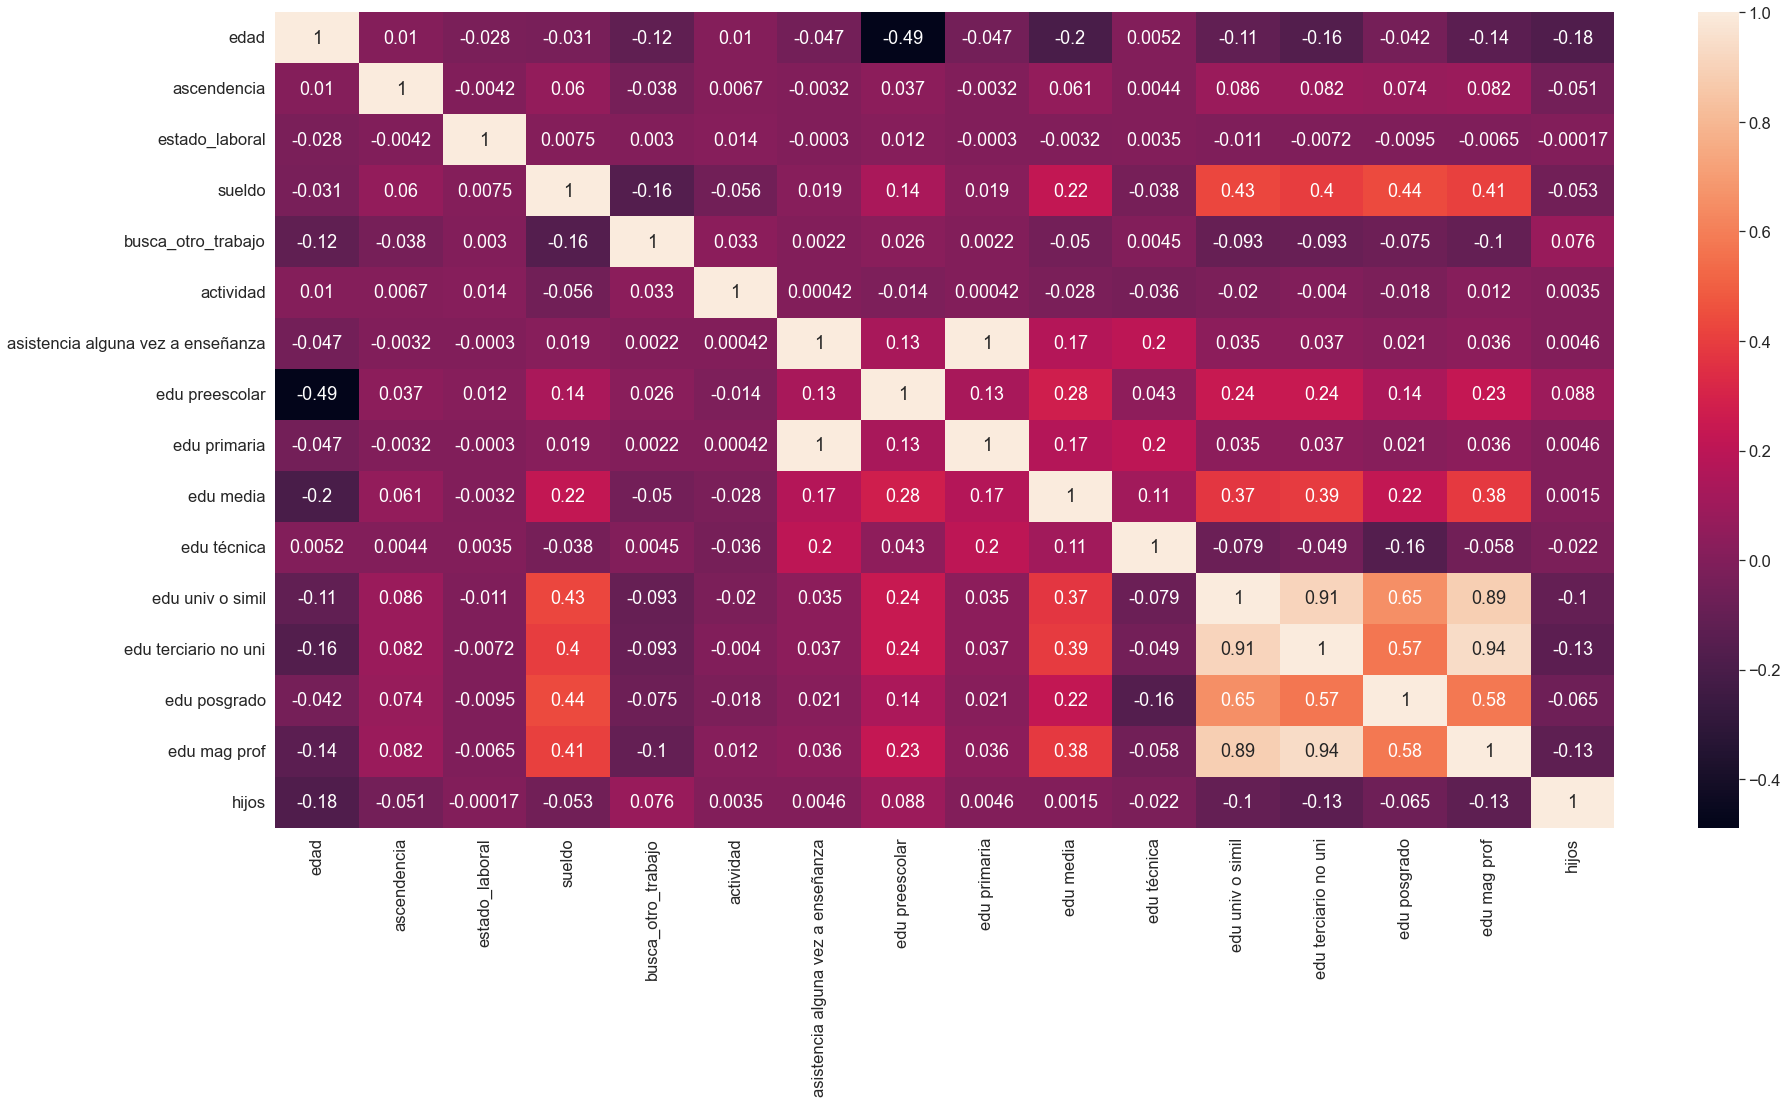

In [5]:
corr = moms.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [6]:
# Feautures
X = moms['actividad'].to_numpy().reshape(-1,1)
y = moms['busca_otro_trabajo'].to_numpy()

print('X shape', X.shape, '\nY shape', y.shape)

X shape (14943, 1) 
Y shape (14943,)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

log_reg.score(X, y)

0.8805460750853242

In [9]:
prediction = np.array([100, 20, 200, 320, 10]).reshape(-1,1)
log_reg.predict(prediction)

array([0, 0, 0, 0, 0], dtype=int8)